### Importing needed packages

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Reading the data

In [3]:
df = pd.read_csv("FuelConsumption.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
df.head(10)  # we take a look at the data set

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [6]:
df.describe()  # summarize the data

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### Now we select some features to work on 

In [7]:
for c in df.columns:
    print(c)

MODELYEAR
MAKE
MODEL
VEHICLECLASS
ENGINESIZE
CYLINDERS
TRANSMISSION
FUELTYPE
FUELCONSUMPTION_CITY
FUELCONSUMPTION_HWY
FUELCONSUMPTION_COMB
FUELCONSUMPTION_COMB_MPG
CO2EMISSIONS


In [8]:
cdf = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
X = cdf[["ENGINESIZE"]].values
Y = cdf[["CO2EMISSIONS"]].values
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


### We can plot the featurs

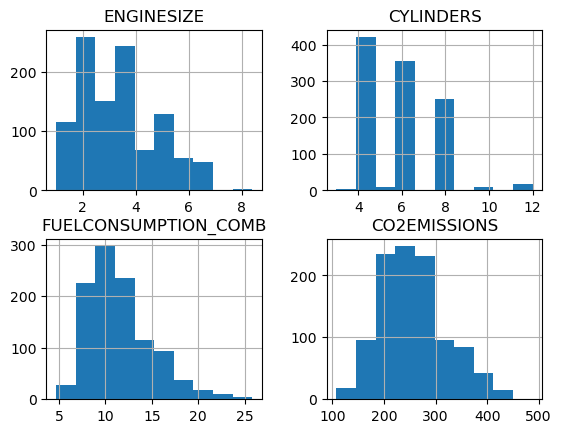

In [9]:
visulalization = cdf[
    ["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]
]
visulalization.hist()
plt.show()

### Now plot the featurs against the CO2 EMISSIONS to see the linear relationship between them

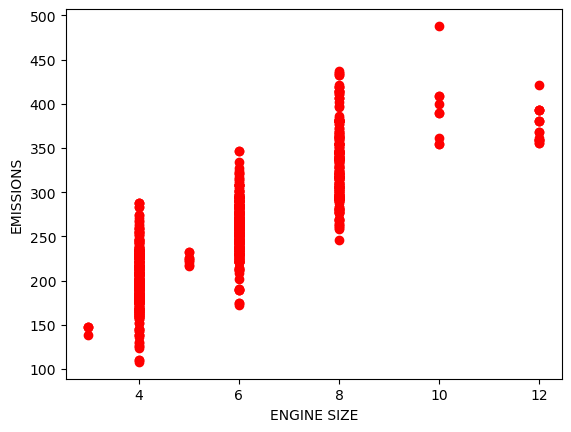

In [10]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color="red")
plt.xlabel("ENGINE SIZE")
plt.ylabel("EMISSIONS")
plt.show()

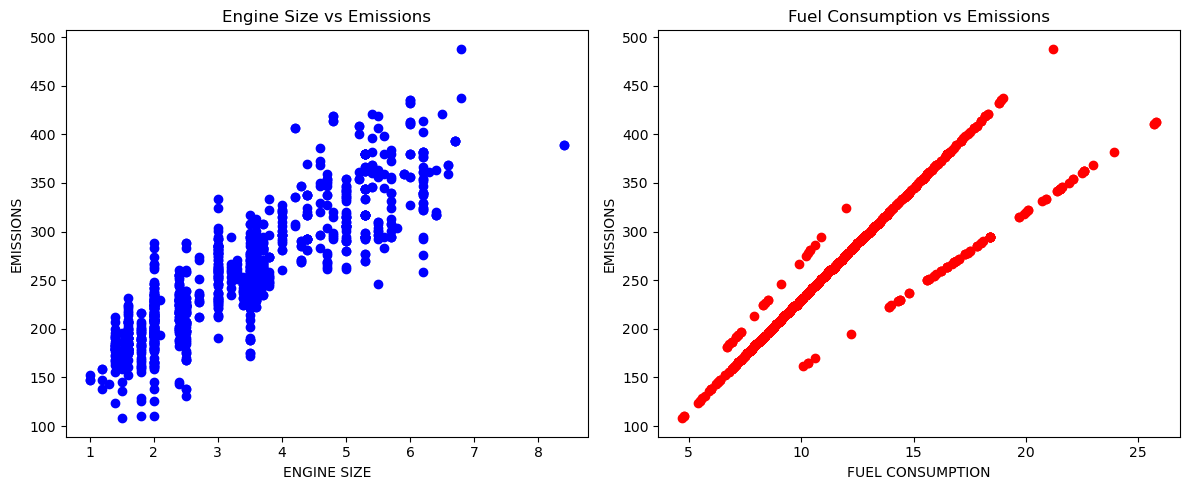

In [11]:
# Create 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# First scatter plot: ENGINE SIZE vs CO2EMISSIONS
axs[0].scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="blue")
axs[0].set_xlabel("ENGINE SIZE")
axs[0].set_ylabel("EMISSIONS")
axs[0].set_title("Engine Size vs Emissions")

# Second scatter plot: FUELCONSUMPTION_COMB vs CO2EMISSIONS
axs[1].scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color="red")
axs[1].set_xlabel("FUEL CONSUMPTION")
axs[1].set_ylabel("EMISSIONS")
axs[1].set_title("Fuel Consumption vs Emissions")

# Adjust layout
plt.tight_layout()
plt.show()

### Creating the train and test dataset

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
print(f"training set :{x_train.shape, y_train.shape}")
print(f"test set :{x_test.shape, y_test.shape}")

training set :((853, 1), (853, 1))
test set :((214, 1), (214, 1))


### Simple Linear Regression Model

In [13]:
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [14]:
print(f"the coefficients:\n{lr.coef_}")
print(f"the intercept:\n{lr.intercept_}")

the coefficients:
[[39.116937]]
the intercept:
[125.14677576]


### Now we plot the output

Text(0.5, 1.0, 'ENGINE_SIZE VS EMISSIONS')

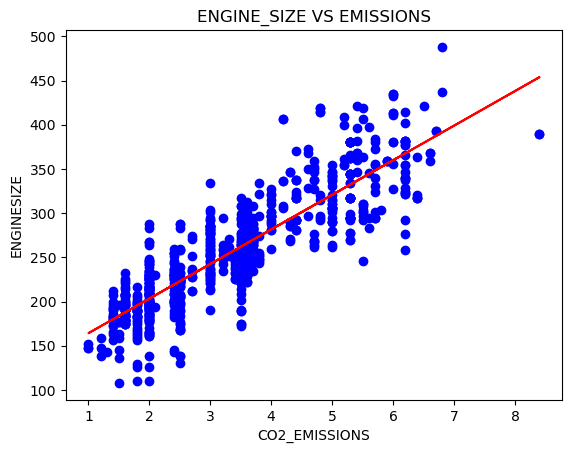

In [15]:
plt.scatter(x_train, y_train, color="blue")
plt.plot(x_train, lr.coef_[0] * x_train + lr.intercept_[0], "-r")
plt.xlabel("CO2_EMISSIONS")
plt.ylabel("ENGINESIZE")
plt.title("ENGINE_SIZE VS EMISSIONS")

# Evaluation
R2_SCORE, MAE and MSE metrics

In [20]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_hat = lr.predict(x_test)
r2 = r2_score(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)

In [21]:
print(f"the r2_score is:\n{r2:.2f}")  # R2_score

the r2_score is:
0.81


In [23]:
print(f"the MAE is:\n{mae:.2f}")  # MEAN ABSOLUTE ERROR

the MAE is:
19.98
